In [1]:
import pandas as pd
df = pd.read_parquet('nigerian_retail_clean.parquet')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'nigerian_retail_clean.parquet'

In [2]:
!pip install pandas pyarrow
# Alternatively, or as a fallback engine, you can use fastparquet:
# !pip install fastparquet


In [3]:
import pandas as pd


In [4]:
import os

# Lấy đường dẫn thư mục hiện tại
current_path = os.getcwd()
print(f"Thư mục hiện tại: {current_path}")


Thư mục hiện tại: /Users/lamdat


In [ ]:
/Users/lamdat/Downloads/nigerian_retail_clean.parquet

In [5]:
import pandas as pd
import os

# Cách 1: Dùng đường dẫn tuyệt đối (thay 'YourName' bằng tên máy của bạn)
path = '/Users/lamdat/Downloads/nigerian_retail_clean.parquet'

# Cách 2: Dùng thư viện os để tự động lấy tên người dùng (an toàn hơn)
home = os.path.expanduser("~")
path = os.path.join(home, "Downloads", "data_sample.parquet")

# Đọc dữ liệu
df = pd.read_parquet(path)

# Hiển thị 5 dòng đầu tiên
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lamdat/Downloads/data_sample.parquet'

In [12]:
import pandas as pd
import os
pd.options.display.float_format = '{:.2f}'.format
# 1. Dán đường dẫn bạn vừa copy ở bước 2 vào đây
path = '/Users/lamdat/Downloads/nigerian_retail_clean.parquet' 

# 2. Kiểm tra file có tồn tại hay không trước khi đọc
if os.path.exists(path):
    print("✅ Đã tìm thấy file! Đang tiến hành đọc...")
    df = pd.read_parquet(path)
    display(df.head())
else:
    print("❌ Vẫn không tìm thấy file.")
    print(f"Thư mục Downloads hiện có các file sau: {os.listdir('/Users/lamdat/Downloads')}")

✅ Đã tìm thấy file! Đang tiến hành đọc...


,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,city,is_repeat_purchase,discount_applied,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent
0,PUR0000000,CUST738296,2023-03-07,sports & outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,Abuja,True,True,0.00,0,684889.45,-0.00,-0.00,0
1,PUR0000001,CUST566795,2024-06-17,health,Supplements,2,297407.47,594814.94,debit_card,mobile_app,Lagos,False,False,0.00,0,594814.94,0.00,0.00,0
2,PUR0000002,CUST238819,2024-06-13,baby & kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,Kaduna,False,True,0.00,0,1419684.70,0.00,0.00,0
3,PUR0000003,CUST974466,2023-09-27,fashion,Jewelry,2,235910.56,471821.12,cash_on_delivery,online,Kano,True,False,0.00,0,471821.12,0.00,0.00,0
4,PUR0000004,CUST686049,2024-05-16,health,Supplements,2,327559.25,655118.50,debit_card,in_store,Aba,False,False,0.00,0,655118.50,0.00,0.00,0


In [13]:
!pip install duckdb

In [14]:
import duckdb

# SQL sẽ hiểu 'df' là một bảng dữ liệu
query = """
SELECT * FROM df 
WHERE is_outlier = 1
"""

df_result = duckdb.query(query).to_df()
display(df_result)

,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,city,is_repeat_purchase,discount_applied,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent
0,PUR0000142,CUST513213,2024-04-13,automotive,Parts,5,487682.85,2438414.25,bank_transfer,mobile_app,Warri,False,False,0.00,1,2438414.25,0.00,0.00,0
1,PUR0000277,CUST608521,2024-09-12,sports & outdoors,Fitness,5,477738.34,2388691.70,bank_transfer,online,Warri,True,True,67046.36,1,2388691.70,0.00,67046.36,1
2,PUR0000308,CUST285030,2024-01-27,automotive,Tools,5,485190.03,2425950.15,bank_transfer,mobile_app,Benin City,False,False,0.00,1,2425950.15,-0.00,-0.00,0
3,PUR0000470,CUST727433,2024-06-20,beauty & personal care,Makeup,5,480743.52,2403717.60,bank_transfer,in_store,Port Harcourt,False,False,0.00,1,2403717.60,0.00,0.00,0
4,PUR0000531,CUST833813,2024-10-11,health,Medical Devices,5,496094.83,2480474.15,cash_on_delivery,online,Ibadan,False,False,22689.98,1,2480474.15,0.00,22689.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,PUR0999594,CUST544312,2023-08-24,health,Medical Devices,5,483431.48,2417157.40,cash_on_delivery,mobile_app,Ibadan,False,False,0.00,1,2417157.40,0.00,0.00,0
9097,PUR0999679,CUST918582,2024-04-29,home & living,Appliances,5,482706.99,2413534.95,credit_card,online,Port Harcourt,True,False,27024.73,1,2413534.95,0.00,27024.73,1
9098,PUR0999728,CUST343362,2024-03-19,fashion,Watches,5,492376.54,2461882.70,ussd,online,Benin City,False,False,0.00,1,2461882.70,0.00,0.00,0
9099,PUR0999886,CUST983006,2023-07-28,health,Wellness,5,495963.27,2479816.35,bank_transfer,online,Onitsha,False,True,0.00,1,2479816.35,0.00,0.00,0


In [11]:
# Xem thông tin tổng quát về kiểu dữ liệu và giá trị thiếu
print(df.info())

# Thống kê mô tả các cột số (Min, Max, Mean, Median)
# Giúp bạn thấy ngay nếu unit_price hoặc quantity có số âm hoặc quá lớn
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   purchase_id             1000000 non-null  object        
 1   customer_id             1000000 non-null  object        
 2   purchase_date           1000000 non-null  datetime64[ns]
 3   product_category        1000000 non-null  object        
 4   product_subcategory     1000000 non-null  object        
 5   quantity                1000000 non-null  int64         
 6   unit_price_ngn          1000000 non-null  float64       
 7   total_amount_ngn        1000000 non-null  float64       
 8   payment_method          1000000 non-null  object        
 9   channel                 1000000 non-null  object        
 10  city                    1000000 non-null  object        
 11  is_repeat_purchase      1000000 non-null  bool          
 12  discount_applie

,purchase_date,quantity,unit_price_ngn,total_amount_ngn,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent
count,1000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000
mean,2023-12-16 23:30:46.857599744,2.999320,250331.587836,7.511750e+05,11288.073970,0.009101,7.511750e+05,1.083076e-13,1.128807e+04,0.300291
min,2023-01-01 00:00:00,1.000000,1000.420000,1.001120e+03,0.000000,0.000000,1.001120e+03,-4.656613e-10,-4.656613e-10,0.000000
25%,2023-06-25 00:00:00,2.000000,125334.870000,2.741738e+05,0.000000,0.000000,2.741738e+05,0.000000e+00,0.000000e+00,0.000000
50%,2023-12-17 00:00:00,3.000000,250244.190000,5.853988e+05,0.000000,0.000000,5.853988e+05,0.000000e+00,0.000000e+00,0.000000
75%,2024-06-09 00:00:00,4.000000,375303.995000,1.119118e+06,6026.157500,0.000000,1.119118e+06,0.000000e+00,6.026157e+03,1.000000
max,2024-12-01 00:00:00,5.000000,499999.960000,2.499993e+06,149664.920000,1.000000,2.499993e+06,4.656613e-10,1.496649e+05,1.000000
std,NaN,1.414425,144137.967404,5.951799e+05,25006.266837,0.094964,5.951799e+05,6.100798e-11,2.500627e+04,0.458385


In [15]:
import pandas as pd

# 1. Chỉnh hiển thị số thập phân cho dễ nhìn
pd.options.display.float_format = '{:.2f}'.format

# 2. Lọc riêng 30% dữ liệu bị lỗi để kiểm tra nguyên nhân
df_error = df[df['is_amount_inconsistent'] == 1]

print(f"Số lượng đơn hàng bị sai lệch tiền: {len(df_error)}")

# 3. Xem các đơn hàng có giá trị cao nhất (có khả năng là Outlier)
top_orders = df.sort_values(by='total_amount_ngn', ascending=False).head(10)
display(top_orders[['purchase_id', 'total_amount_ngn', 'is_outlier', 'diff_plus_discount']])

Số lượng đơn hàng bị sai lệch tiền: 300291


,purchase_id,total_amount_ngn,is_outlier,diff_plus_discount
225080,PUR0225080,2499993.45,1,95871.69
881462,PUR0881462,2499989.35,1,65042.81
939850,PUR0939850,2499977.35,1,0.00
765018,PUR0765018,2499952.45,1,0.00
78013,PUR0078013,2499949.15,1,137236.87
644167,PUR0644167,2499948.45,1,101169.82
564199,PUR0564199,2499943.00,1,0.00
799846,PUR0799846,2499932.95,1,117461.43
628307,PUR0628307,2499924.30,1,9281.10
699523,PUR0699523,2499915.10,1,106358.61


In [16]:
# Kiểm tra xem có bất kỳ giá trị nào nhỏ hơn 0 trong toàn bộ DataFrame không
(df.select_dtypes(include=['number']) < 0).any()

quantity                  False
unit_price_ngn            False
total_amount_ngn          False
discount_amount_ngn       False
is_outlier                False
calculated_total          False
diff                       True
diff_plus_discount         True
is_amount_inconsistent    False
dtype: bool

In [30]:
# SQL sẽ hiểu 'df' là một bảng dữ liệu
query = """
SELECT * FROM df 
WHERE discount_amount_ngn < 0
"""

df_result = duckdb.query(query).to_df()
display(df_result)

,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,city,is_repeat_purchase,discount_applied,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent,is_outlier_2


In [19]:
import pandas as pd

# Chỉnh định dạng hiển thị số để không bị hiện e+06
pd.options.display.float_format = '{:.2f}'.format

# Tính các mốc phân vị
percentiles = df['total_amount_ngn'].quantile([0.7, 0.8, 0.9, 0.95, 0.99])
max_val = df['total_amount_ngn'].max()

print("--- So sánh các phân vị với giá trị Max ---")
print(percentiles)
print(f"Max: {max_val}")

--- So sánh các phân vị với giá trị Max ---
0.70    975179.08
0.80   1278194.39
0.90   1668021.16
0.95   1944711.73
0.99   2375506.92
Name: total_amount_ngn, dtype: float64
Max: 2499993.45


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


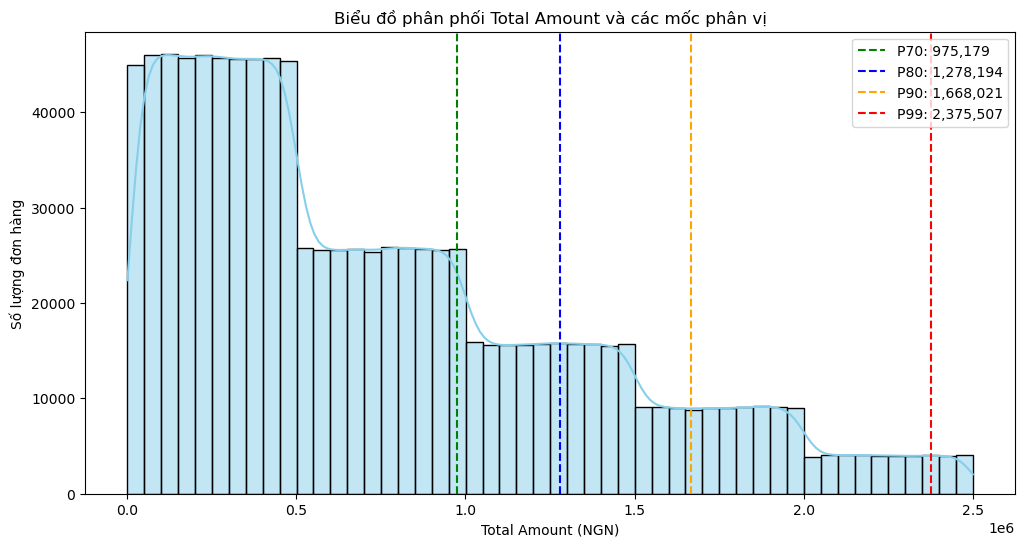

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ phân phối
sns.histplot(df['total_amount_ngn'], kde=True, bins=50, color='skyblue')

# Vẽ các đường thẳng đứng đánh dấu phân vị
colors = ['green', 'blue', 'orange', 'red']
p_levels = [0.7, 0.8, 0.9, 0.99]

for p, color in zip(p_levels, colors):
    val = df['total_amount_ngn'].quantile(p)
    plt.axvline(val, color=color, linestyle='--', label=f'P{int(p*100)}: {val:,.0f}')

plt.title('Biểu đồ phân phối Total Amount và các mốc phân vị')
plt.xlabel('Total Amount (NGN)')
plt.ylabel('Số lượng đơn hàng')
plt.legend()
plt.show()

In [22]:
import pandas as pd
import numpy as np

# --- BƯỚC 1: TÍNH NGƯỠNG OUTLIER ---
Q1 = df['total_amount_ngn'].quantile(0.25)
Q3 = df['total_amount_ngn'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# --- BƯỚC 2: TẠO CỘT IS_OUTLIER_2 ---
df['is_outlier_2'] = np.where(df['total_amount_ngn'] > upper_limit, 1, 0)

# --- BƯỚC 3: KIỂM TRA ĐỘ KHỚP ---
accuracy = (df['is_outlier'] == df['is_outlier_2']).mean() * 100
print(f"Tỷ lệ khớp giữa 2 phương pháp: {accuracy:.2f}%")

# --- BƯỚC 4: XEM CÁC DÒNG BỊ LỆCH (MISMATCH) ---
# Hệ thống cũ bảo là Outlier (1) nhưng IQR bảo là Bình thường (0)
check_mismatch = df[(df['is_outlier'] == 1) & (df['is_outlier_2'] == 0)]

print(f"Số lượng dòng bị lệch: {len(check_mismatch)}")

if not check_mismatch.empty:
    # Lưu ý: Viết danh sách cột trên cùng một dòng để tránh lỗi Syntax
    cols_to_show = ['purchase_id', 'total_amount_ngn', 'is_outlier', 'is_outlier_2']
    display(check_mismatch[cols_to_show].head(10))

Tỷ lệ khớp giữa 2 phương pháp: 100.00%
Số lượng dòng bị lệch: 0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


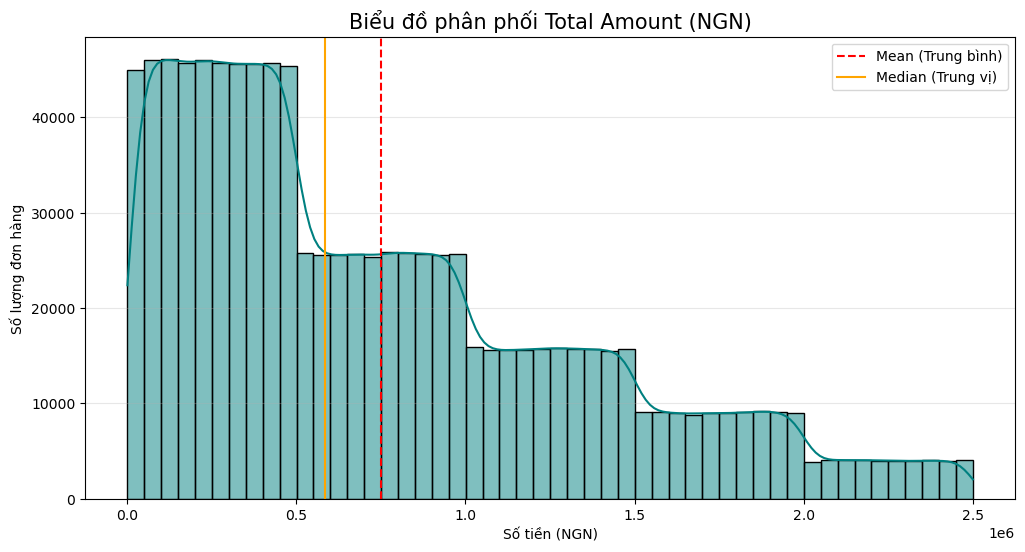

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cấu hình kích thước biểu đồ
plt.figure(figsize=(12, 6))

# 2. Vẽ Histogram kết hợp đường KDE
# bins=50: Chia dữ liệu thành 50 cột để xem độ chi tiết
# kde=True: Vẽ thêm đường cong phân phối
sns.histplot(df['total_amount_ngn'], bins=50, kde=True, color='teal')

# 3. Thêm các đường mốc quan trọng (Mean và Median) để xem độ lệch
plt.axvline(df['total_amount_ngn'].mean(), color='red', linestyle='--', label='Mean (Trung bình)')
plt.axvline(df['total_amount_ngn'].median(), color='orange', linestyle='-', label='Median (Trung vị)')

# 4. Trang trí biểu đồ
plt.title('Biểu đồ phân phối Total Amount (NGN)', fontsize=15)
plt.xlabel('Số tiền (NGN)')
plt.ylabel('Số lượng đơn hàng')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


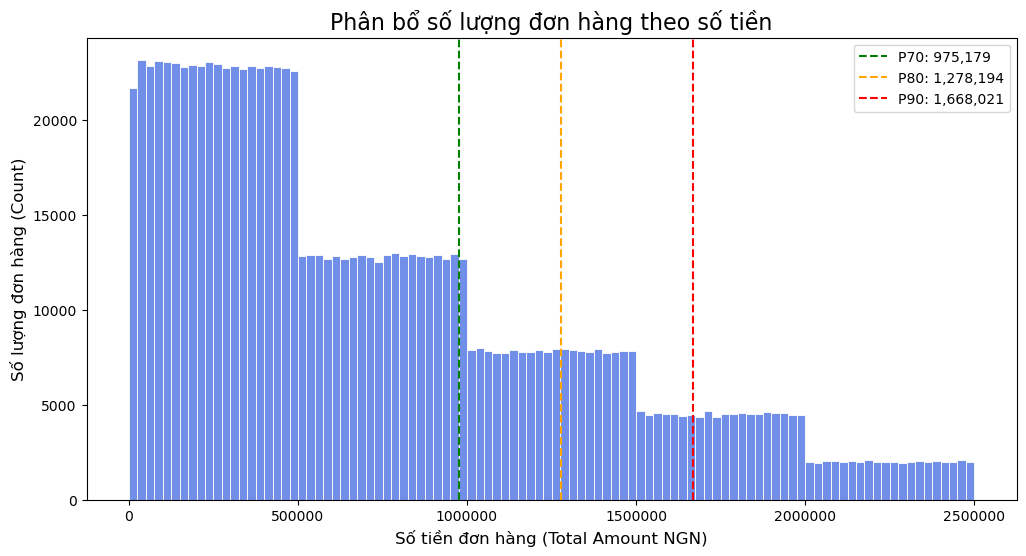

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cấu hình kích thước
plt.figure(figsize=(12, 6))

# 2. Vẽ biểu đồ
# bins=100: Chia dữ liệu thành 100 cột để xem sự phân bổ mịn hơn
sns.histplot(df['total_amount_ngn'], bins=100, color='royalblue', edgecolor='white')

# 3. Thêm các đường giới hạn phân vị (P70, P80, P90) để xem điểm gãy
p_levels = [0.7, 0.8, 0.9]
colors = ['green', 'orange', 'red']

for p, col in zip(p_levels, colors):
    val = df['total_amount_ngn'].quantile(p)
    plt.axvline(val, color=col, linestyle='--', label=f'P{int(p*100)}: {val:,.0f}')

# 4. Đặt tên trục và tiêu đề
plt.title('Phân bổ số lượng đơn hàng theo số tiền', fontsize=16)
plt.xlabel('Số tiền đơn hàng (Total Amount NGN)', fontsize=12)
plt.ylabel('Số lượng đơn hàng (Count)', fontsize=12)
plt.legend()

# 5. Làm đẹp định dạng số trên trục X (không hiện e+06)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [34]:
import pandas as pd
import numpy as np

# 1. Tạo cột mới trên bảng gốc (vẫn giữ đủ 1 triệu dòng)
df['is_discount_applied'] = np.where(df['discount_amount_ngn'].abs() > 1e-9, 1, 0)

# 2. Cấu hình để Pandas hiển thị tối đa 100 dòng (thay vì mặc định chỉ hiện 10-20 dòng)
pd.set_option('display.max_rows', 100)

# 3. Show 100 dòng đầu tiên của bảng df
# Bạn dùng .head(100) để trích xuất 100 dòng đầu ra màn hình
df.head(100)

,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,...,is_repeat_purchase,discount_applied,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent,is_outlier_2,is_discount_applied
0,PUR0000000,CUST738296,2023-03-07,sports & outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,...,True,True,0.00,0,684889.45,-0.00,-0.00,0,0,0
1,PUR0000001,CUST566795,2024-06-17,health,Supplements,2,297407.47,594814.94,debit_card,mobile_app,...,False,False,0.00,0,594814.94,0.00,0.00,0,0,0
2,PUR0000002,CUST238819,2024-06-13,baby & kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,...,False,True,0.00,0,1419684.70,0.00,0.00,0,0,0
3,PUR0000003,CUST974466,2023-09-27,fashion,Jewelry,2,235910.56,471821.12,cash_on_delivery,online,...,True,False,0.00,0,471821.12,0.00,0.00,0,0,0
4,PUR0000004,CUST686049,2024-05-16,health,Supplements,2,327559.25,655118.50,debit_card,in_store,...,False,False,0.00,0,655118.50,0.00,0.00,0,0,0
5,PUR0000005,CUST140765,2023-12-11,groceries,Beverages,3,219949.35,659848.05,cash_on_delivery,online,...,False,False,0.00,0,659848.05,0.00,0.00,0,0,0
6,PUR0000006,CUST235402,2024-08-04,books & media,Educational,3,309542.21,928626.63,cash_on_delivery,mobile_app,...,True,False,0.00,0,928626.63,-0.00,-0.00,0,0,0
7,PUR0000007,CUST400595,2023-05-27,fashion,Bags,5,106015.55,530077.75,bank_transfer,online,...,True,False,0.00,0,530077.75,0.00,0.00,0,0,0
8,PUR0000008,CUST440519,2023-01-04,health,Medical Devices,1,99156.76,99156.76,debit_card,in_store,...,True,False,0.00,0,99156.76,0.00,0.00,0,0,0
9,PUR0000009,CUST280049,2023-08-01,automotive,Parts,2,282876.65,565753.30,bank_transfer,mobile_app,...,False,False,0.00,0,565753.30,0.00,0.00,0,0,0


In [37]:
query_1 = """
SELECT * FROM df 
WHERE is_discount_applied =0 and discount_applied = true
"""

df_result_1 = duckdb.query(query_1).to_df()
display(df_result_1)

,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,...,is_repeat_purchase,discount_applied,discount_amount_ngn,is_outlier,calculated_total,diff,diff_plus_discount,is_amount_inconsistent,is_outlier_2,is_discount_applied
0,PUR0000000,CUST738296,2023-03-07,sports & outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,...,True,True,0.00,0,684889.45,-0.00,-0.00,0,0,0
1,PUR0000002,CUST238819,2024-06-13,baby & kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,...,False,True,0.00,0,1419684.70,0.00,0.00,0,0,0
2,PUR0000013,CUST359521,2024-04-16,groceries,Beverages,4,62687.68,250750.72,cash_on_delivery,online,...,False,True,0.00,0,250750.72,0.00,0.00,0,0,0
3,PUR0000014,CUST220358,2024-04-15,sports & outdoors,Activewear,3,174365.40,523096.20,cash_on_delivery,online,...,True,True,0.00,0,523096.20,0.00,0.00,0,0,0
4,PUR0000021,CUST853680,2024-03-24,home & living,Appliances,4,498358.64,1993434.56,debit_card,in_store,...,False,True,0.00,0,1993434.56,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210309,PUR0999979,CUST863870,2024-10-19,sports & outdoors,Fitness,1,101829.82,101829.82,cash_on_delivery,in_store,...,False,True,0.00,0,101829.82,0.00,0.00,0,0,0
210310,PUR0999986,CUST921573,2024-09-15,automotive,Parts,2,348420.17,696840.34,cash_on_delivery,mobile_app,...,True,True,0.00,0,696840.34,0.00,0.00,0,0,0
210311,PUR0999990,CUST716182,2024-05-04,beauty & personal care,Hair Care,4,267359.56,1069438.24,bank_transfer,mobile_app,...,False,True,0.00,0,1069438.24,0.00,0.00,0,0,0
210312,PUR0999991,CUST170842,2024-11-10,fashion,Clothing,1,277036.92,277036.92,cash_on_delivery,mobile_app,...,True,True,0.00,0,277036.92,0.00,0.00,0,0,0


5 dòng dữ liệu sau khi đã chuẩn hóa (Sẵn sàng cho GMM):


,R_scaled,F_scaled,M_scaled
customer_id,,,
CUST100002,0.05,0.58,-0.23
CUST100003,0.67,0.58,-1.33
CUST100005,-0.22,-0.83,0.06
CUST100006,1.18,-0.83,-0.42
CUST100007,0.08,0.58,0.41


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


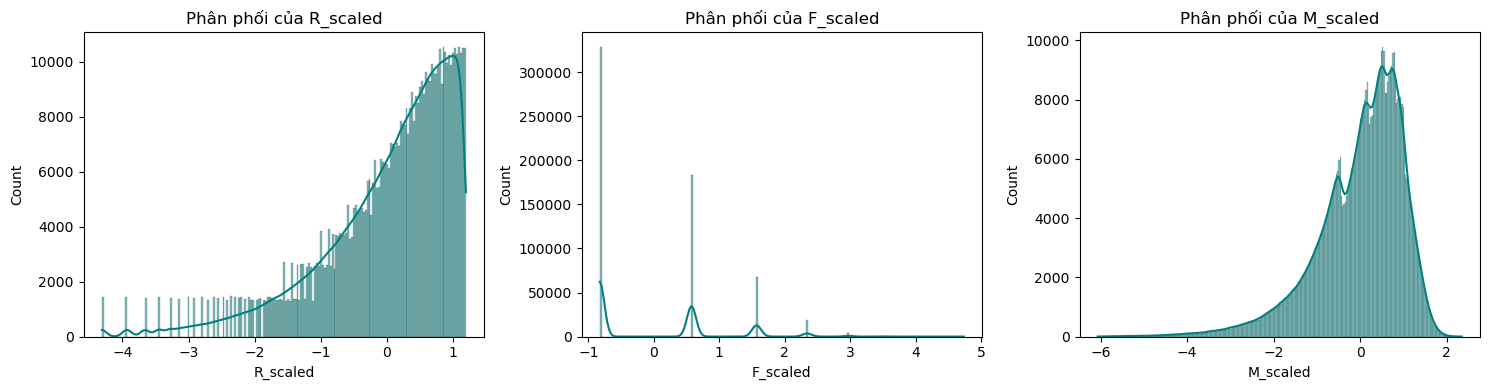

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- BƯỚC 1: TÍNH TOÁN CHỈ SỐ RFM GỐC ---
# Giả định ngày hiện tại là sau ngày cuối cùng trong data 1 ngày
current_date = df['purchase_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'purchase_date': lambda x: (current_date - x.max()).days, # Recency
    'purchase_id': 'count',                                 # Frequency
    'total_amount_ngn': 'sum'                               # Monetary
}).rename(columns={
    'purchase_date': 'Recency',
    'purchase_id': 'Frequency',
    'total_amount_ngn': 'Monetary'
})

# --- BƯỚC 2: XỬ LÝ ĐỘ LỆCH (LOG TRANSFORMATION) ---
# Dùng log1p (log của 1 + x) để tránh lỗi nếu có giá trị bằng 0
rfm_log = np.log1p(rfm)

# --- BƯỚC 3: CHUẨN HÓA DỮ LIỆU (STANDARDIZATION) ---
scaler = StandardScaler()
rfm_scaled_array = scaler.fit_transform(rfm_log)

# Chuyển kết quả về DataFrame để dễ quản lý và đặt tên cột mới
rfm_final = pd.DataFrame(
    rfm_scaled_array, 
    index=rfm.index, 
    columns=['R_scaled', 'F_scaled', 'M_scaled']
)

# --- BƯỚC 4: KIỂM TRA KẾT QUẢ ---
print("5 dòng dữ liệu sau khi đã chuẩn hóa (Sẵn sàng cho GMM):")
display(rfm_final.head())

# Vẽ biểu đồ kiểm tra phân phối sau khi xử lý
plt.figure(figsize=(15, 4))
for i, col in enumerate(rfm_final.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm_final[col], kde=True, color='teal')
    plt.title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd

# 1. Kết hợp bảng RFM gốc và bảng RFM đã scaled thành một bảng bổ trợ duy nhất
# Cả hai bảng này đều có index là customer_id
rfm_features = pd.concat([rfm, rfm_final], axis=1)

# 2. Thực hiện Left Join bảng giao dịch gốc (df) với bảng rfm_features
# Chúng ta join dựa trên cột 'customer_id'
df_dat = df.merge(rfm_features, on='customer_id', how='left')

# 3. Kiểm tra kết quả
print(f"Kích thước bảng mới df_dat: {df_dat.shape}")
print("\nCác cột mới đã được thêm vào:")
print(df_dat[['customer_id', 'Recency', 'Frequency', 'Monetary', 'R_scaled', 'F_scaled', 'M_scaled']].head())

# Hiển thị 5 dòng đầu tiên của bảng tổng hợp df_dat
display(df_dat.head())

Kích thước bảng mới df_dat: (1000000, 27)

Các cột mới đã được thêm vào:
  customer_id  Recency  Frequency   Monetary  R_scaled  F_scaled  M_scaled
0  CUST738296      187          2 1676040.95     -0.05      0.58      0.66
1  CUST566795       65          3 2459054.88     -1.03      1.57      1.01
2  CUST238819       35          3 2486090.27     -1.60      1.57      1.02
3  CUST974466      432          1  471821.12      0.74     -0.83     -0.49
4  CUST686049      200          4 2025133.84      0.02      2.34      0.83


,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,...,diff_plus_discount,is_amount_inconsistent,is_outlier_2,is_discount_applied,Recency,Frequency,Monetary,R_scaled,F_scaled,M_scaled
0,PUR0000000,CUST738296,2023-03-07,sports & outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,...,-0.00,0,0,0,187,2,1676040.95,-0.05,0.58,0.66
1,PUR0000001,CUST566795,2024-06-17,health,Supplements,2,297407.47,594814.94,debit_card,mobile_app,...,0.00,0,0,0,65,3,2459054.88,-1.03,1.57,1.01
2,PUR0000002,CUST238819,2024-06-13,baby & kids,Clothing,5,283936.94,1419684.70,cash_on_delivery,in_store,...,0.00,0,0,0,35,3,2486090.27,-1.60,1.57,1.02
3,PUR0000003,CUST974466,2023-09-27,fashion,Jewelry,2,235910.56,471821.12,cash_on_delivery,online,...,0.00,0,0,0,432,1,471821.12,0.74,-0.83,-0.49
4,PUR0000004,CUST686049,2024-05-16,health,Supplements,2,327559.25,655118.50,debit_card,in_store,...,0.00,0,0,0,200,4,2025133.84,0.02,2.34,0.83


In [41]:
query_2 = """
SELECT * FROM df_dat 
where customer_id ='CUST738296'
"""

df_result_2 = duckdb.query(query_2).to_df()
display(df_result_2)

,purchase_id,customer_id,purchase_date,product_category,product_subcategory,quantity,unit_price_ngn,total_amount_ngn,payment_method,channel,...,diff_plus_discount,is_amount_inconsistent,is_outlier_2,is_discount_applied,Recency,Frequency,Monetary,R_scaled,F_scaled,M_scaled
0,PUR0000000,CUST738296,2023-03-07,sports & outdoors,Sports Equipment,5,136977.89,684889.45,cash_on_delivery,online,...,-0.00,0,0,0,187,2,1676040.95,-0.05,0.58,0.66
1,PUR0662257,CUST738296,2024-05-29,fashion,Watches,5,198230.30,991151.50,cash_on_delivery,mobile_app,...,39446.72,1,0,1,187,2,1676040.95,-0.05,0.58,0.66


In [42]:
# Kiểm tra lại tên các cột trước khi xuất
print(f"Danh sách các cột sẽ xuất: {df_dat.columns.tolist()}")

# Xuất file Parquet
# compression='snappy': giúp file nhẹ hơn nhưng vẫn đọc/ghi nhanh
df_dat.to_parquet('transaction_data_rfm_final.parquet', compression='snappy', index=False)

print("--- Đã xuất file thành công! ---")

Danh sách các cột sẽ xuất: ['purchase_id', 'customer_id', 'purchase_date', 'product_category', 'product_subcategory', 'quantity', 'unit_price_ngn', 'total_amount_ngn', 'payment_method', 'channel', 'city', 'is_repeat_purchase', 'discount_applied', 'discount_amount_ngn', 'is_outlier', 'calculated_total', 'diff', 'diff_plus_discount', 'is_amount_inconsistent', 'is_outlier_2', 'is_discount_applied', 'Recency', 'Frequency', 'Monetary', 'R_scaled', 'F_scaled', 'M_scaled']
--- Đã xuất file thành công! ---


In [47]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 1. Chuẩn bị dữ liệu đầu vào (chỉ lấy 3 cột đã được feature engineering)
X = df_dat[['R_scaled', 'F_scaled', 'M_scaled']].drop_duplicates() 
# Lưu ý: Mình dùng drop_duplicates vì RFM tính theo customer_id, 
# trong df_dat mỗi khách có nhiều dòng giao dịch giống hệt nhau về RFM.

# 2. Cấu hình số cụm (Giả sử chọn 4 cụm như đã thảo luận)
n_clusters = 3

# --- CHẠY K-MEANS ---
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels, sample_size=10000) # Lấy mẫu 10k dòng để tính nhanh

# --- CHẠY GMM ---
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, gmm_labels, sample_size=10000)

# 3. HIỂN THỊ KẾT QUẢ SO SÁNH
print(f"--- KẾT QUẢ SO SÁNH (Số cụm = {n_clusters}) ---")
print(f"Silhouette Score của K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score của GMM:     {gmm_silhouette:.4f}")

if gmm_silhouette > kmeans_silhouette:
    print("\n=> KẾT LUẬN: GMM phù hợp hơn với dữ liệu của bạn!")
else:
    print("\n=> KẾT LUẬN: K-Means cho kết quả phân tách rõ ràng hơn!")

--- KẾT QUẢ SO SÁNH (Số cụm = 3) ---
Silhouette Score của K-Means: 0.3889
Silhouette Score của GMM:     0.2948

=> KẾT LUẬN: K-Means cho kết quả phân tách rõ ràng hơn!


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

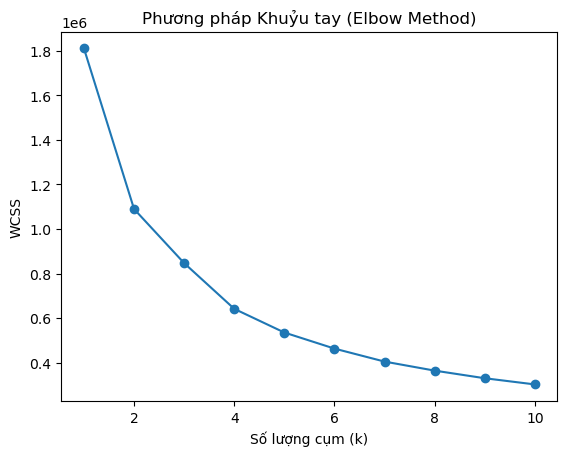

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_final)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WCSS')
plt.show()

In [46]:
results = {}
for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels, sample_size=10000)
    results[k] = score
    print(f"Số cụm k={k} có điểm Silhouette là: {score:.4f}")

best_k = max(results, key=results.get)
print(f"\n=> Về mặt toán học, bạn nên chọn k={best_k}")

Số cụm k=3 có điểm Silhouette là: 0.3866
Số cụm k=4 có điểm Silhouette là: 0.3619
Số cụm k=5 có điểm Silhouette là: 0.3611

=> Về mặt toán học, bạn nên chọn k=3
